In [ ]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Unzip the dataset from Drive to the local Colab environment
#    Note: Copying to /content/ is much faster for training than reading directly from Drive.
!unzip "/content/drive/MyDrive/Dataset.v1i.yolov8.zip" -d /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/Dataset.v1i.yolov8.zip
replace /content/Dataset.v1i.yolov8/data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/test/images/frame00048_png.rf.142c63bd60cb5e595d6c14ce52ea1ff1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/test/images/frame00096_png.rf.35c448749610b024028861e6e8373cfb.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/test/images/frame00143_png.rf.96e840c7ab33d9a8f12d78af3dda2bcd.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/Dataset.v1i.yolov8/test/images/frame00184_png.rf.cce634186c4bcf31b0f4a79b8c5dd022.jpg?

In [ ]:
# 1. Check GPU and CUDA versions
!nvidia-smi

# 2. Install the Ultralytics library (YOLOv8)
!pip install ultralytics

# 3. Run a system check to confirm setup (optional but good practice)
!yolo checks

Thu Dec 11 19:52:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os

# Define the dataset path (local path after unzipping)
dataset_path = "/content/Dataset.v1i.yolov8"

print("Starting Data Fix...")

# 4. FIX LABELS: Walk through all folders and fix .txt files using Python
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".txt") and "README" not in file:
            file_path = os.path.join(root, file)

            # Read the file
            with open(file_path, 'r') as f:
                lines = f.readlines()

            # Write corrections (Change class '1' to '0')
            with open(file_path, 'w') as f:
                for line in lines:
                    if line.startswith('1 '):
                        f.write('0 ' + line[2:])
                    else:
                        f.write(line)

print("All label files have been processed and corrected.")



Starting Data Fix...
All label files have been processed and corrected.


In [ ]:
# 5. DELETE CACHE: Explicitly remove cache files to force a re-scan
for split in ['train', 'valid', 'test']:
    cache_path = os.path.join(dataset_path, split, 'labels.cache')
    if os.path.exists(cache_path):
        os.remove(cache_path)
        print(f"Deleted old cache: {cache_path}")

print("Data is clean and ready for training!")



Deleted old cache: /content/Dataset.v1i.yolov8/train/labels.cache
Deleted old cache: /content/Dataset.v1i.yolov8/valid/labels.cache
Data is clean and ready for training!


In [ ]:
# 6. Start Training
!yolo task=detect mode=train \
    model=yolov8n.pt \
    data={dataset_path}/data.yaml \
    epochs=20 \
    imgsz=640 \
    name=faculty_presentation_run



Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Dataset.v1i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=faculty_presentation_run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

In [ ]:
# 7. Run prediction on the Test Set
#    Using a confidence of 0.25 (standard) to see all detections.
#    You can change conf=0.25 to conf=0.9 if you want the "strict" test.
!yolo task=detect mode=predict \
    model=/content/runs/detect/faculty_presentation_run/weights/best.pt \
    source=/content/Dataset.v1i.yolov8/test/images \
    save=True \
    name=test_predictions \
    conf=0.25



Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/9 /content/Dataset.v1i.yolov8/test/images/GRMN0160_MP4-0_jpg.rf.ece3964faea201edd0b3f7d7e7244e52.jpg: 384x640 1 road-lanes, 42.4ms
image 2/9 /content/Dataset.v1i.yolov8/test/images/GRMN0234_MP4-16_jpg.rf.9de8d2a7c9217f8ad68b23b6b2f04b03.jpg: 384x640 (no detections), 5.8ms
image 3/9 /content/Dataset.v1i.yolov8/test/images/GRMN0661_MP4-9_jpg.rf.337103d0d96d90d120a606e39cf7d502.jpg: 384x640 1 road-lanes, 5.6ms
image 4/9 /content/Dataset.v1i.yolov8/test/images/frame00048_png.rf.142c63bd60cb5e595d6c14ce52ea1ff1.jpg: 384x640 1 road-lanes, 5.6ms
image 5/9 /content/Dataset.v1i.yolov8/test/images/frame00096_png.rf.35c448749610b024028861e6e8373cfb.jpg: 384x640 1 road-lanes, 5.6ms
image 6/9 /content/Dataset.v1i.yolov8/test/images/frame00143_png.rf.96e840c7ab33d9a8f12d78af3dda2bcd.jpg: 384x640 1 road-lanes, 5.5ms
image 7/9 /cont


 Results from Test Set:


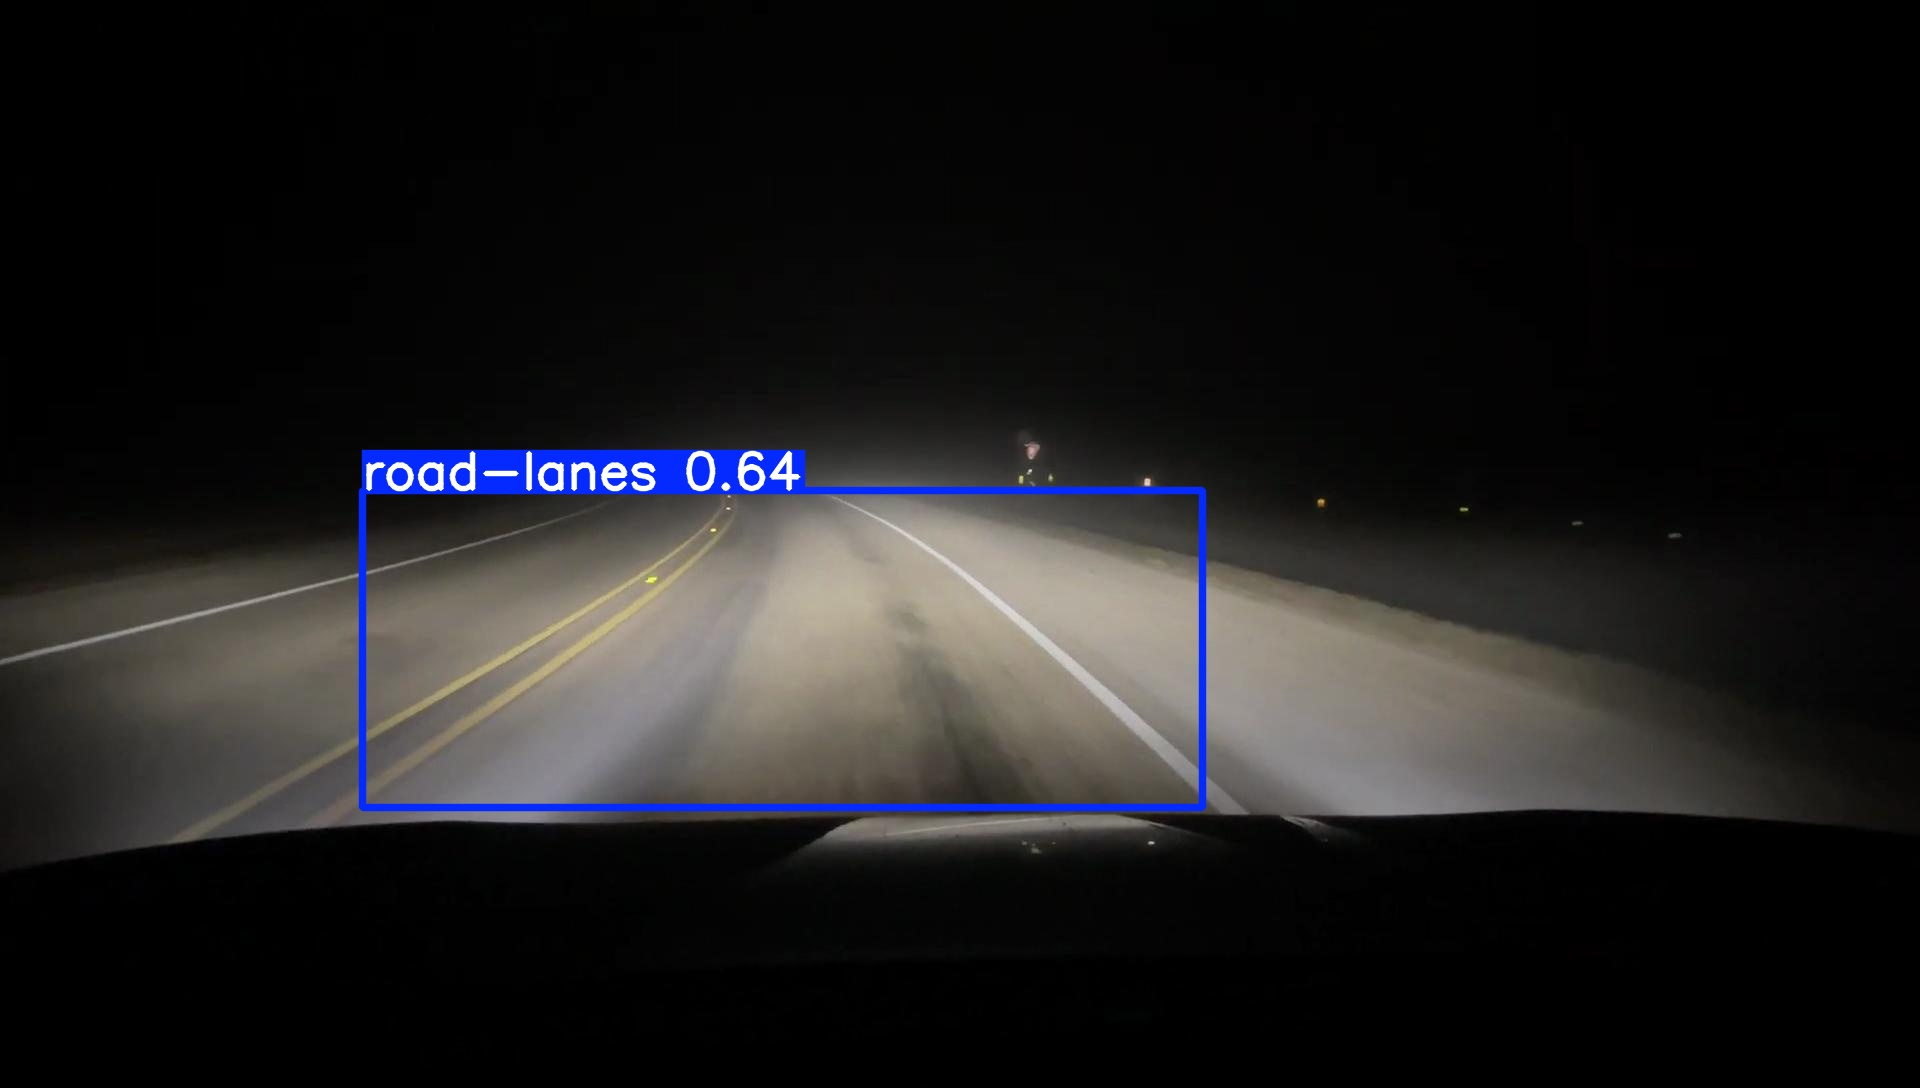

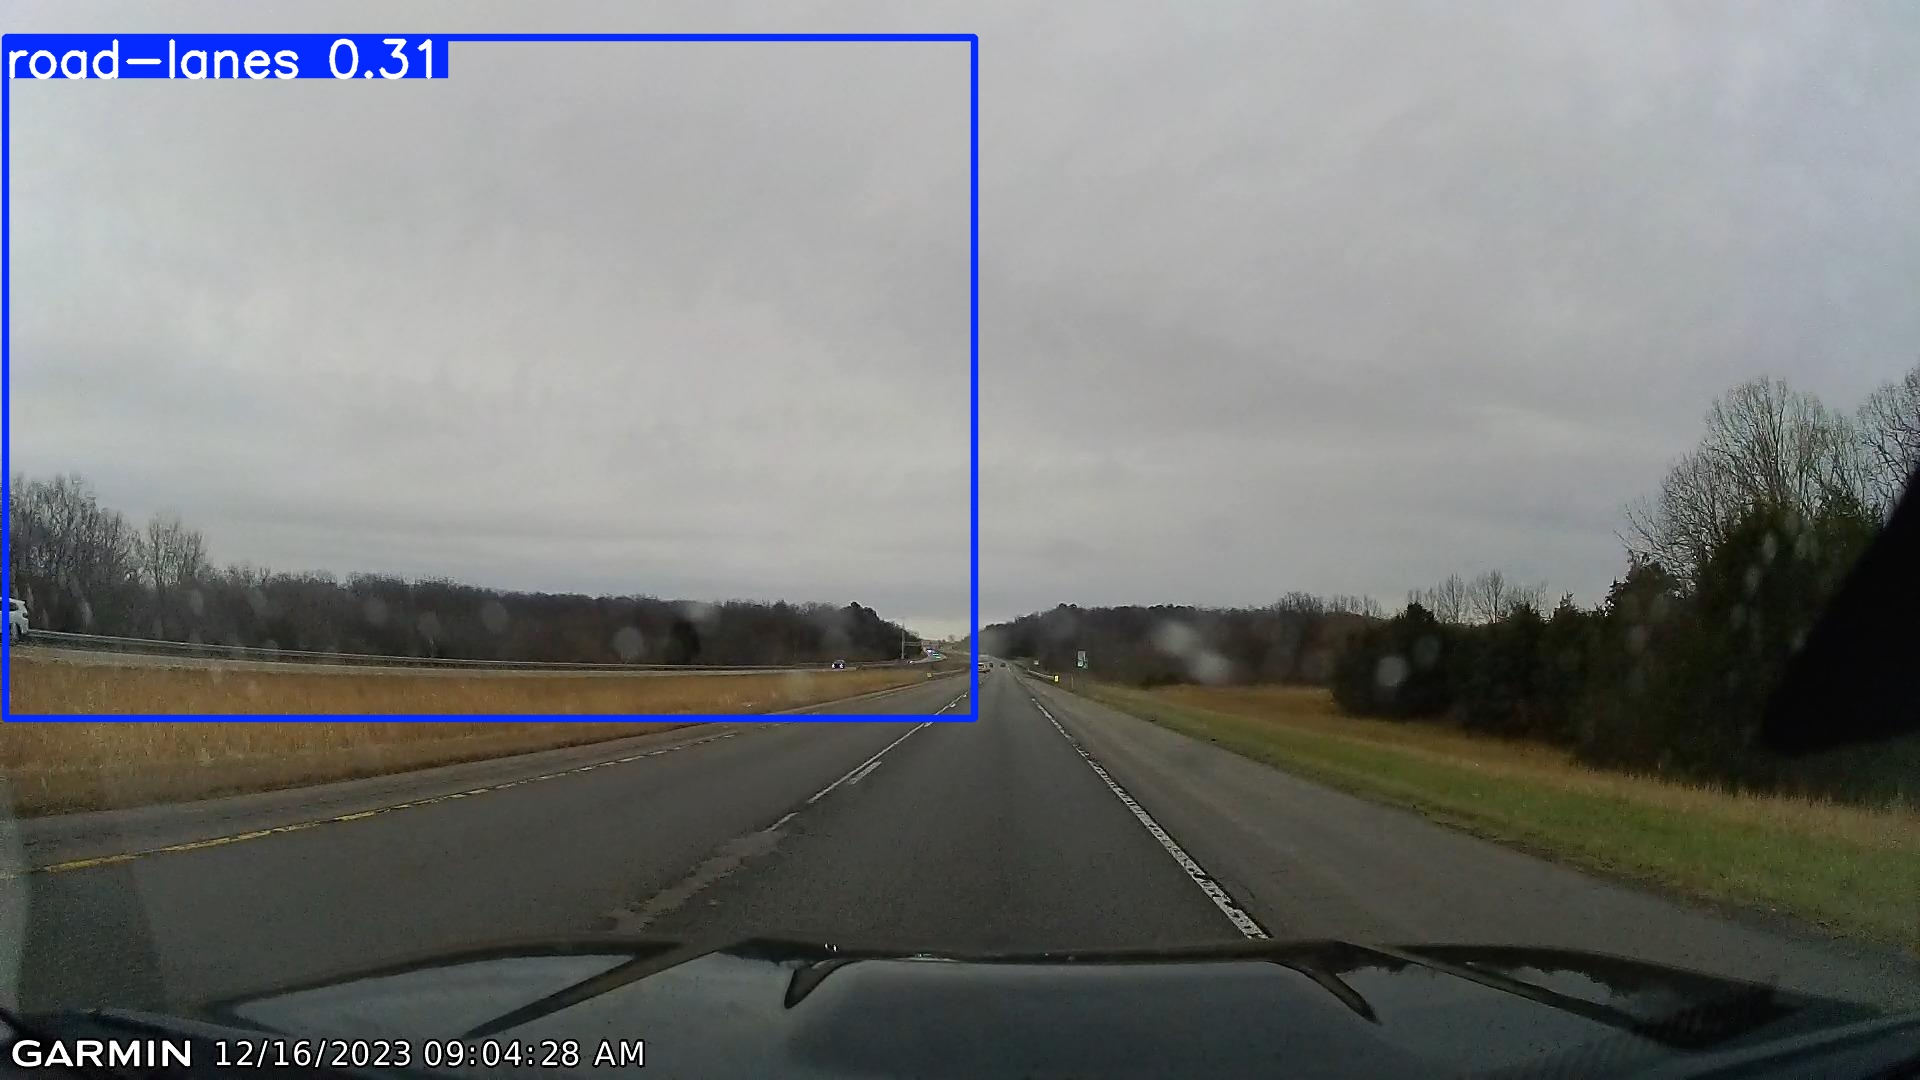

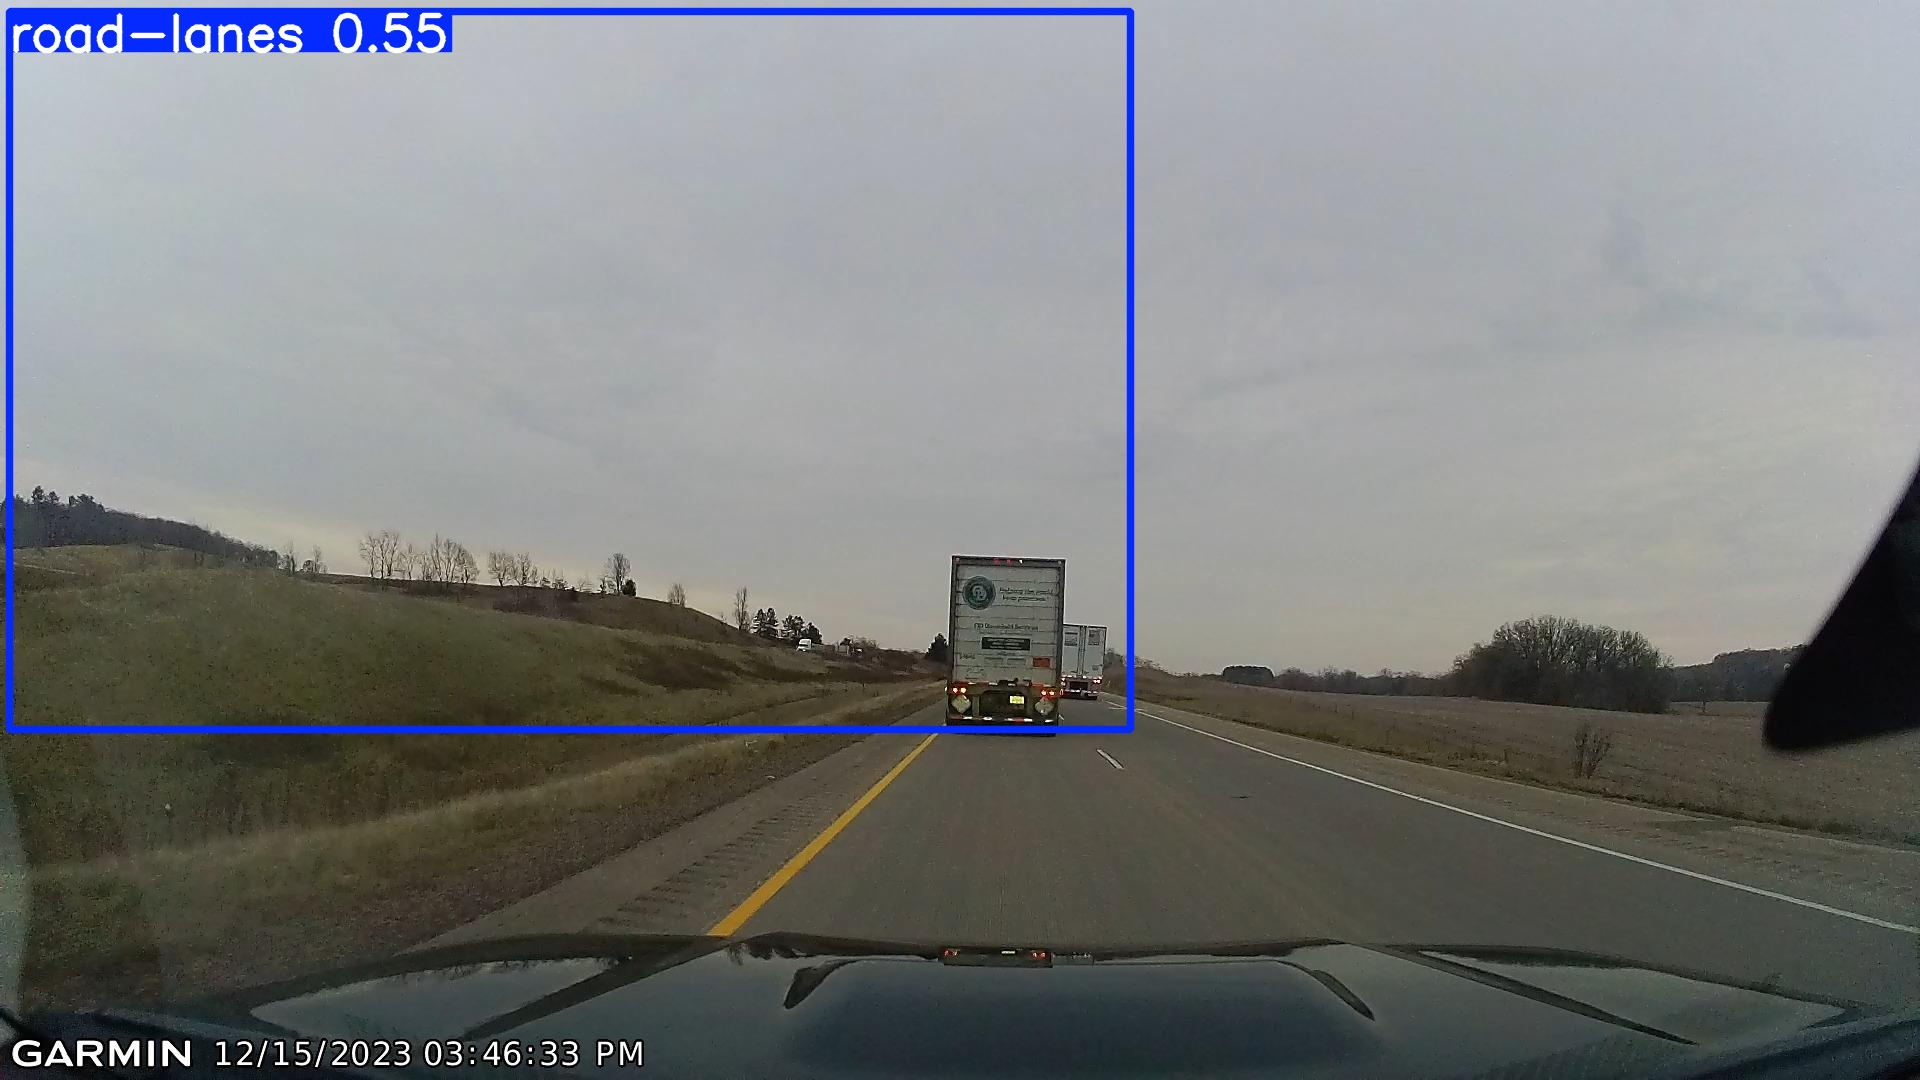

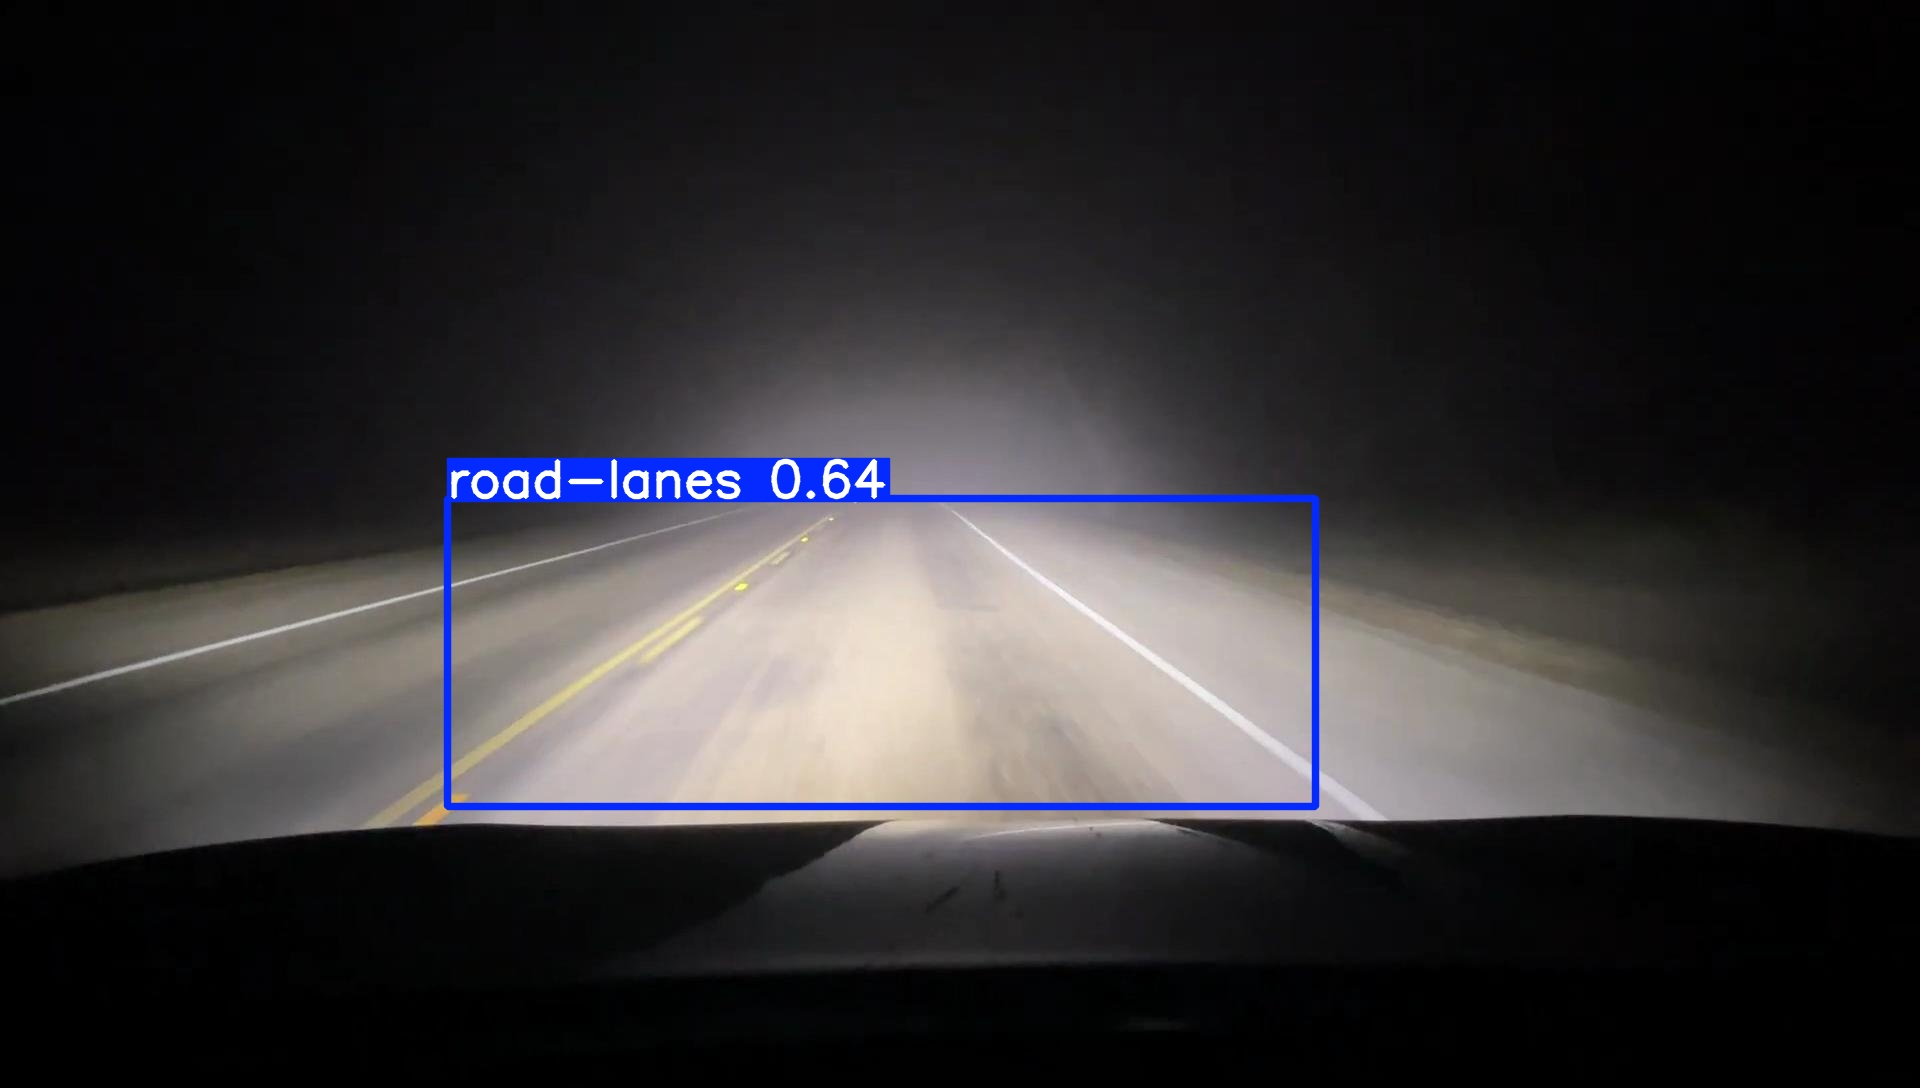

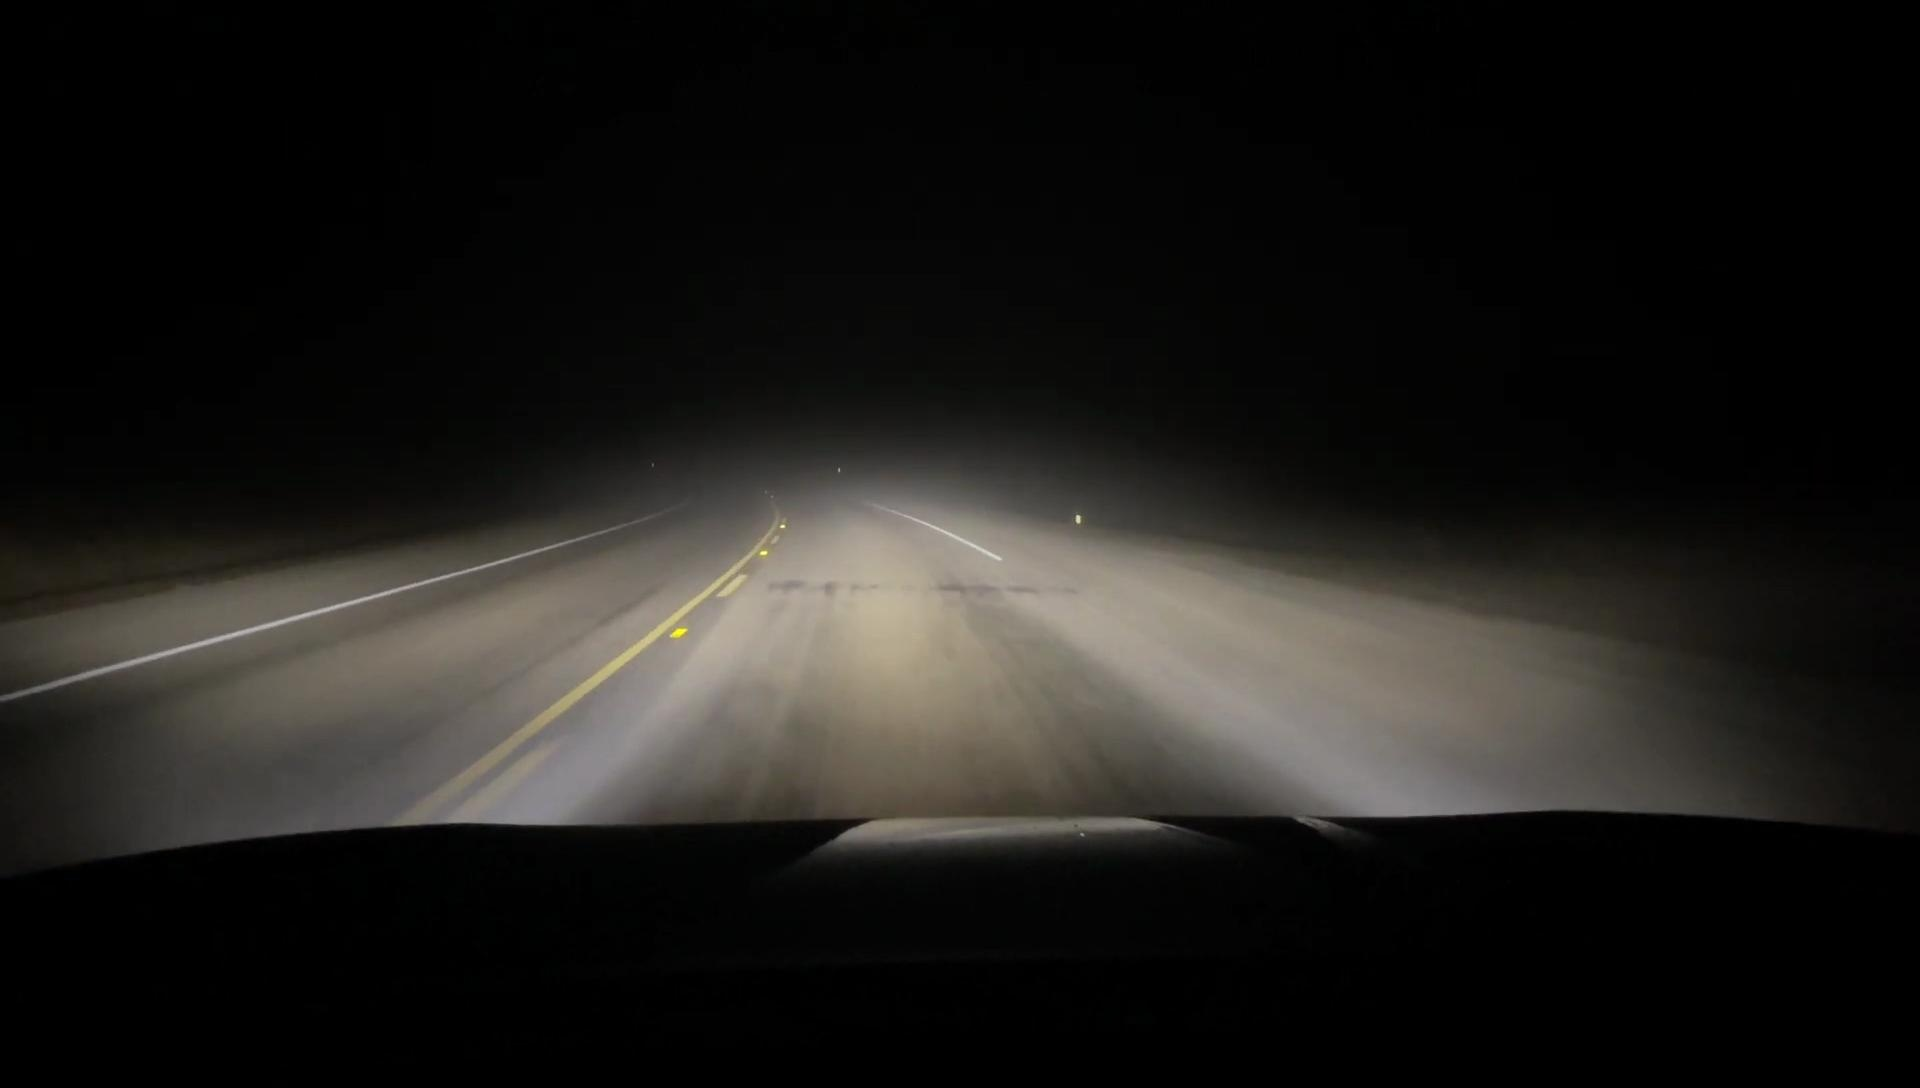

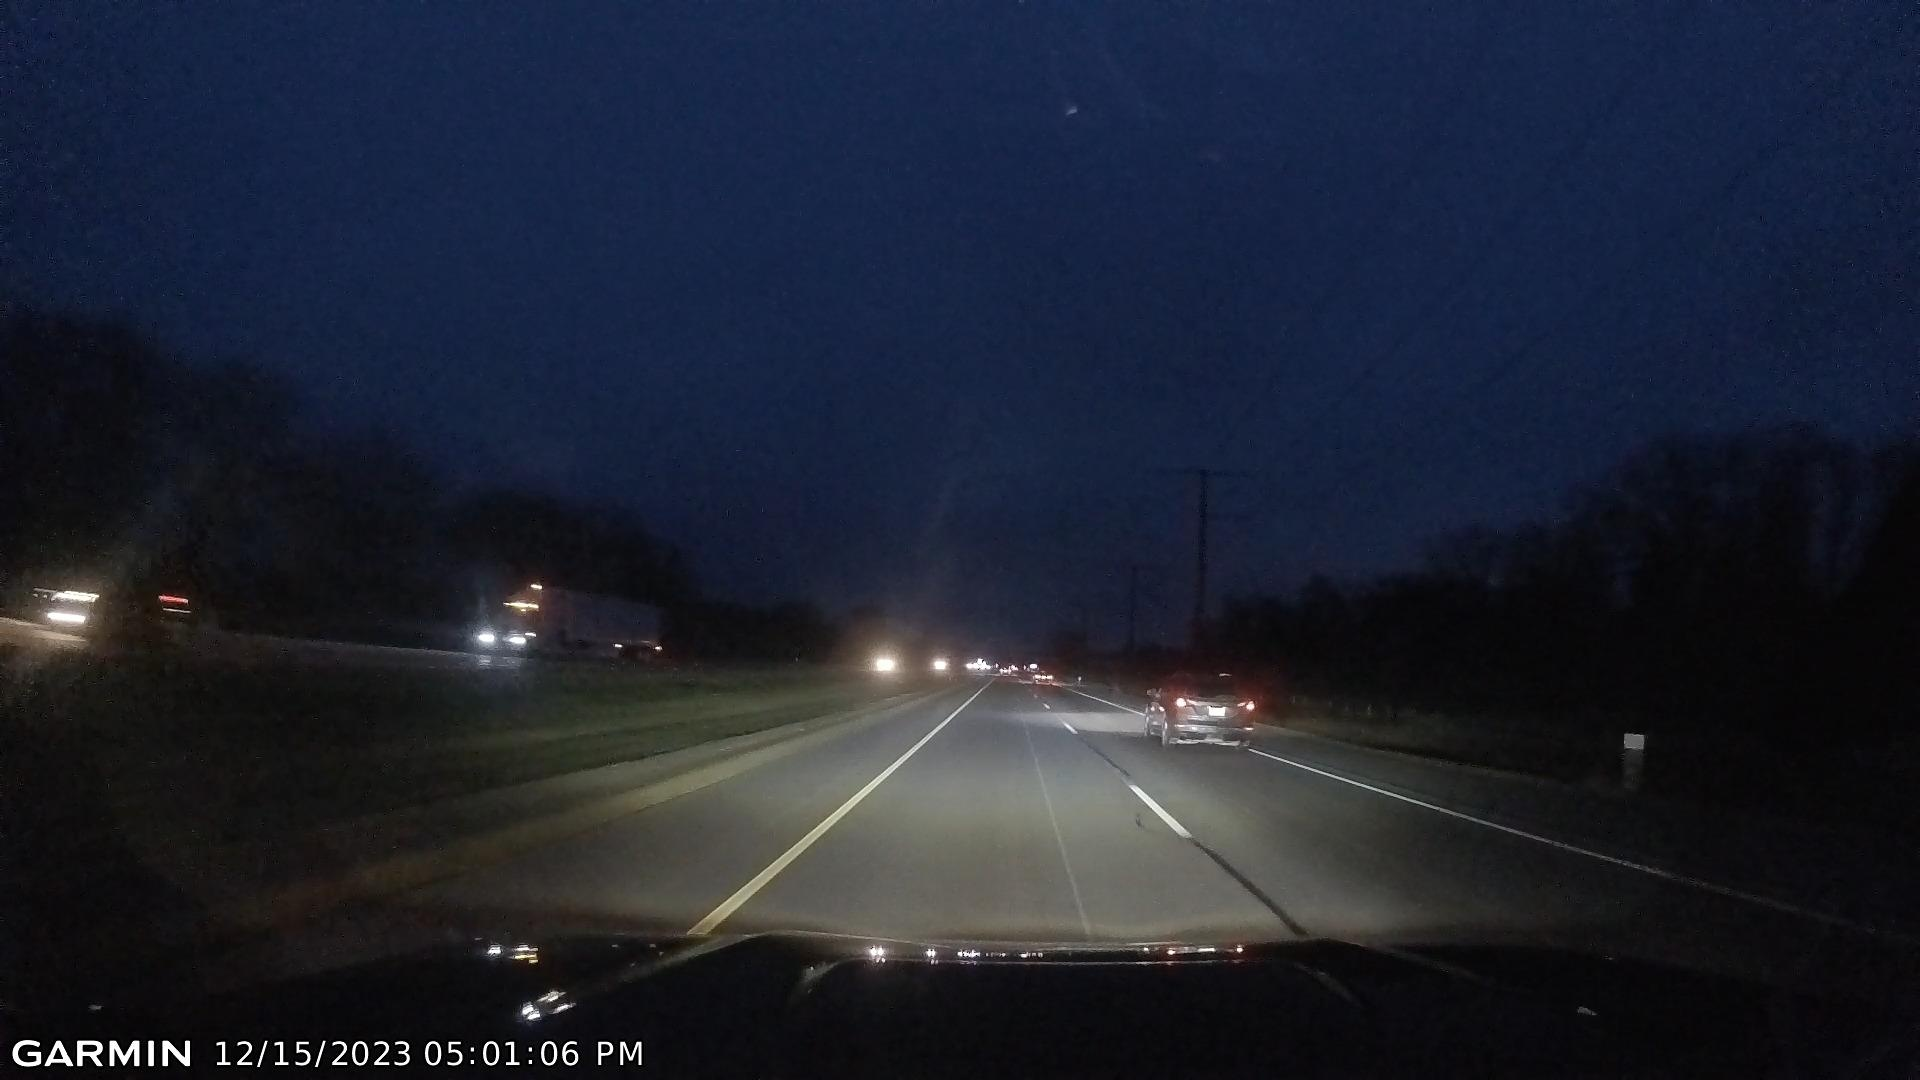

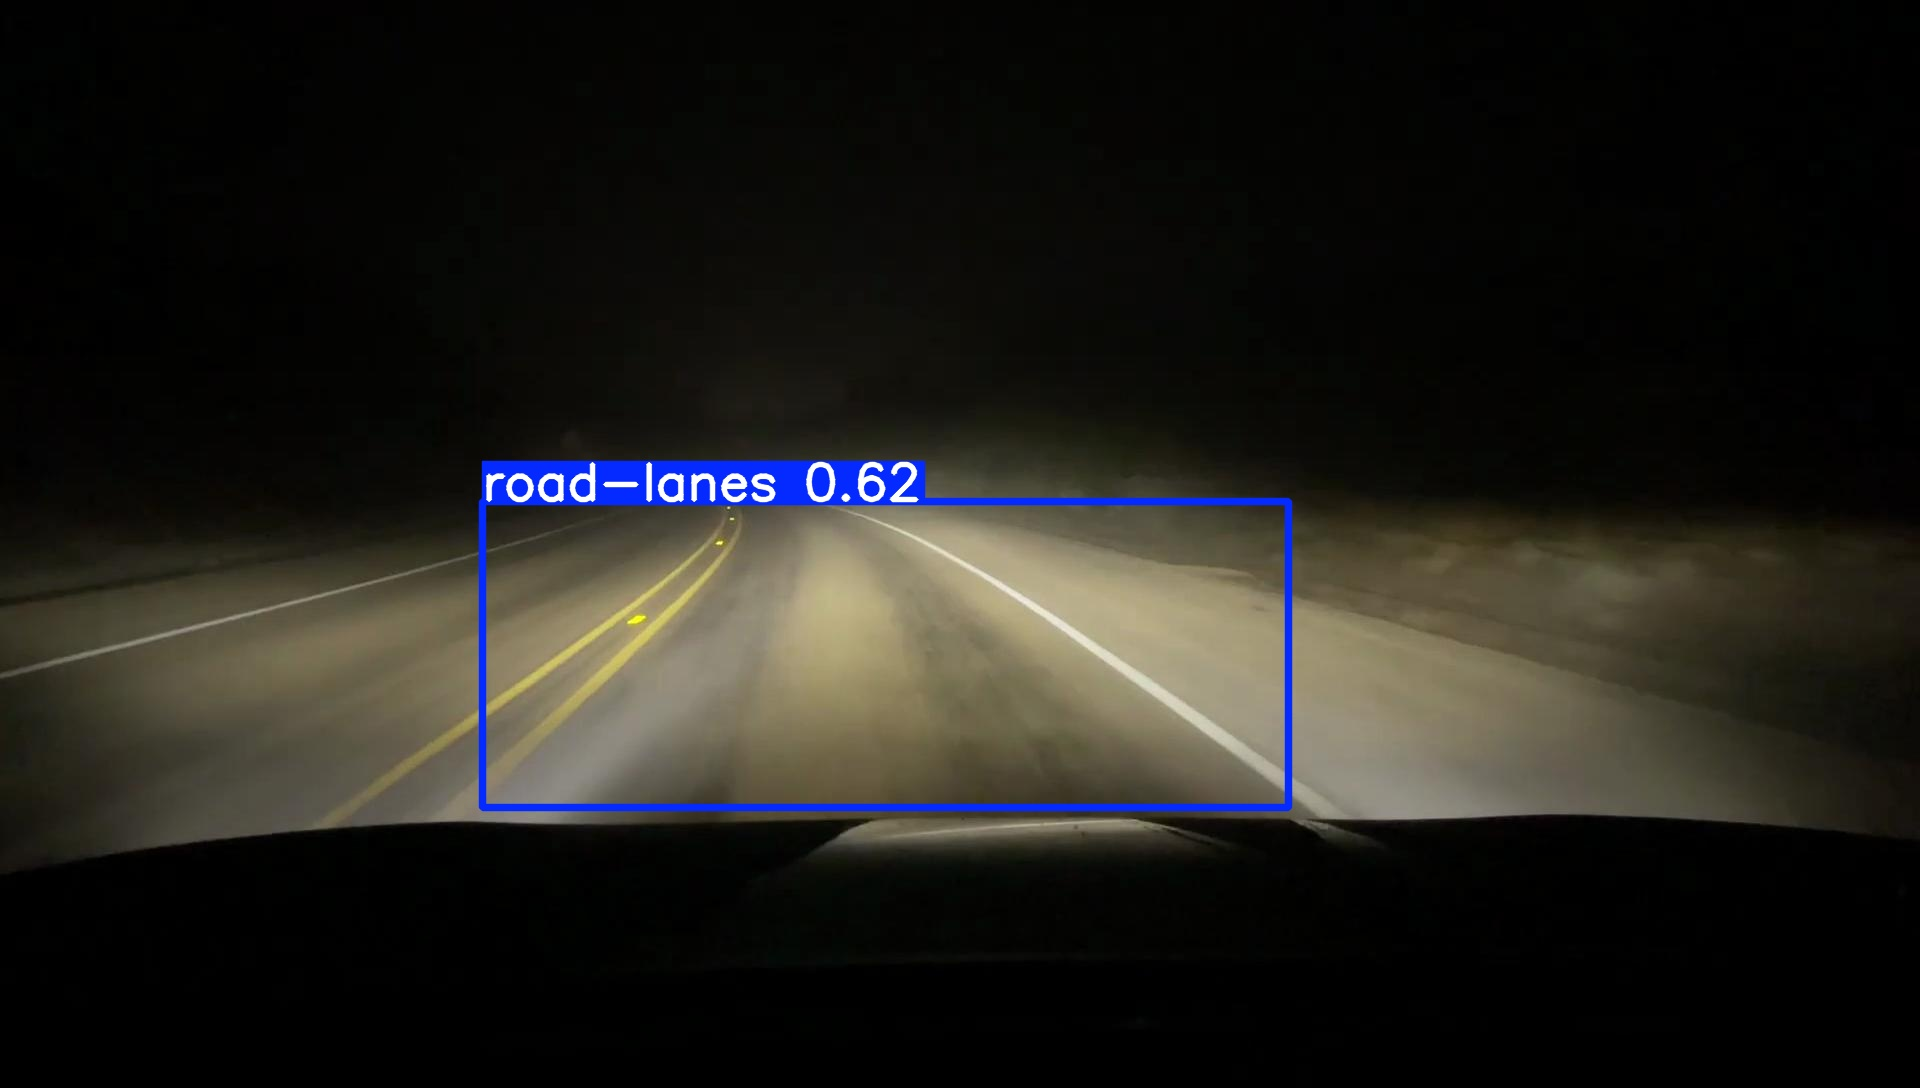

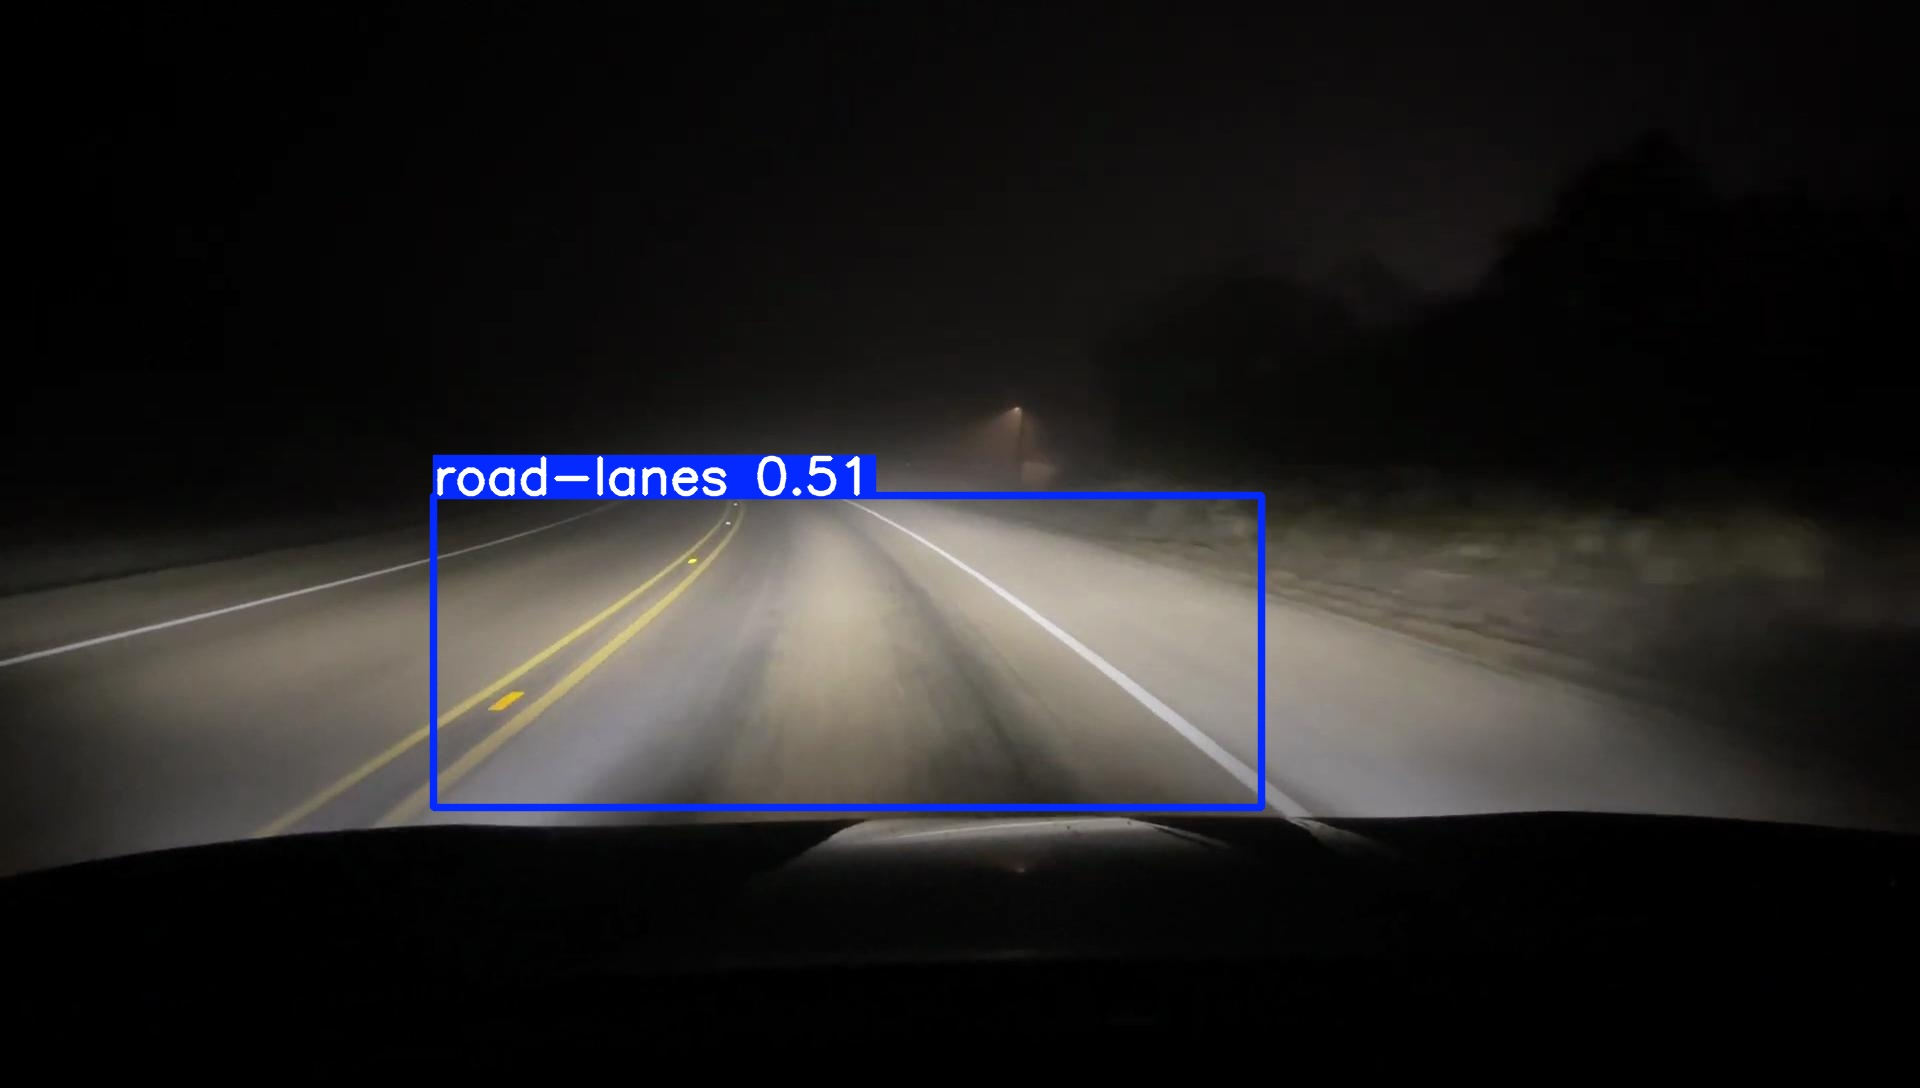

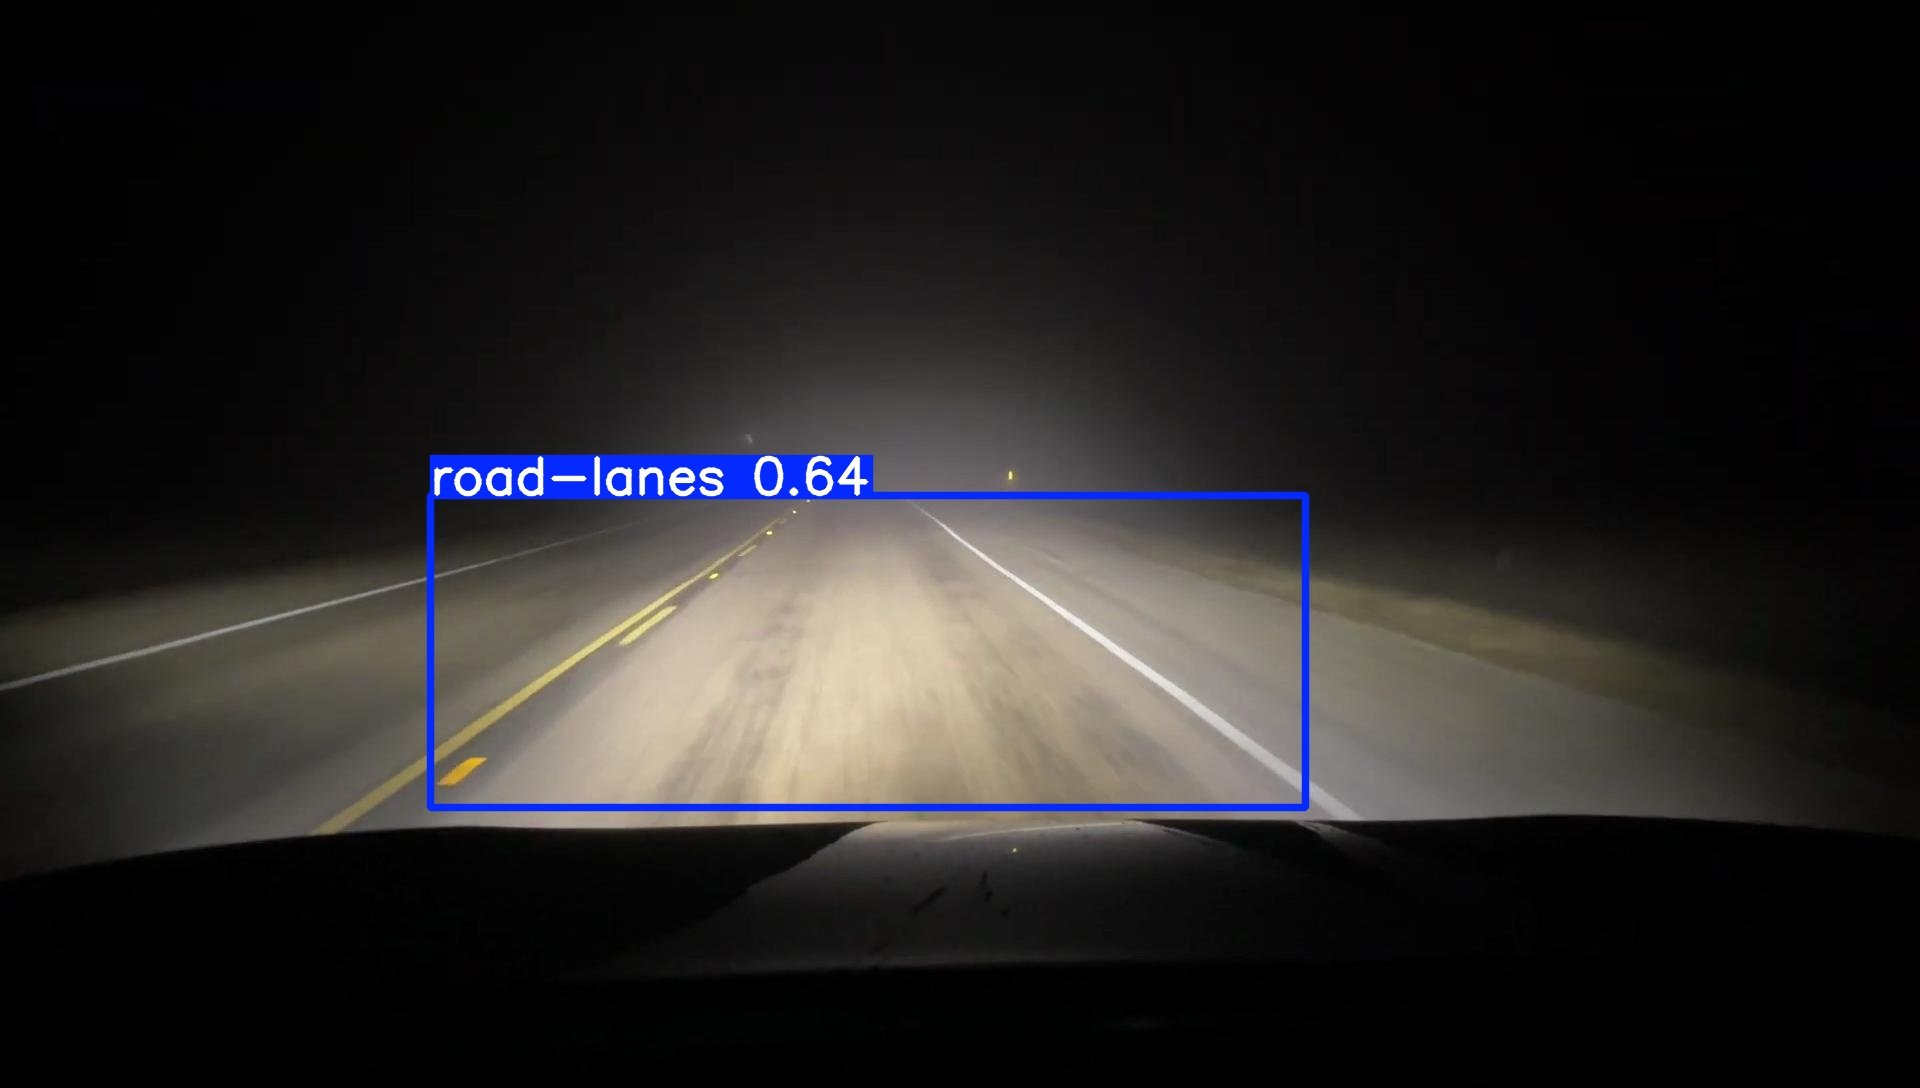

In [ ]:
# 8. Display the results
import glob
from IPython.display import Image, display

print("\n Results from Test Set:")
output_dir = "/content/runs/detect/test_predictions"
for image_path in glob.glob(f'{output_dir}/*.jpg')[:10]:
    display(Image(filename=image_path, height=400))
    print('\n')




 Confusion Matrix:


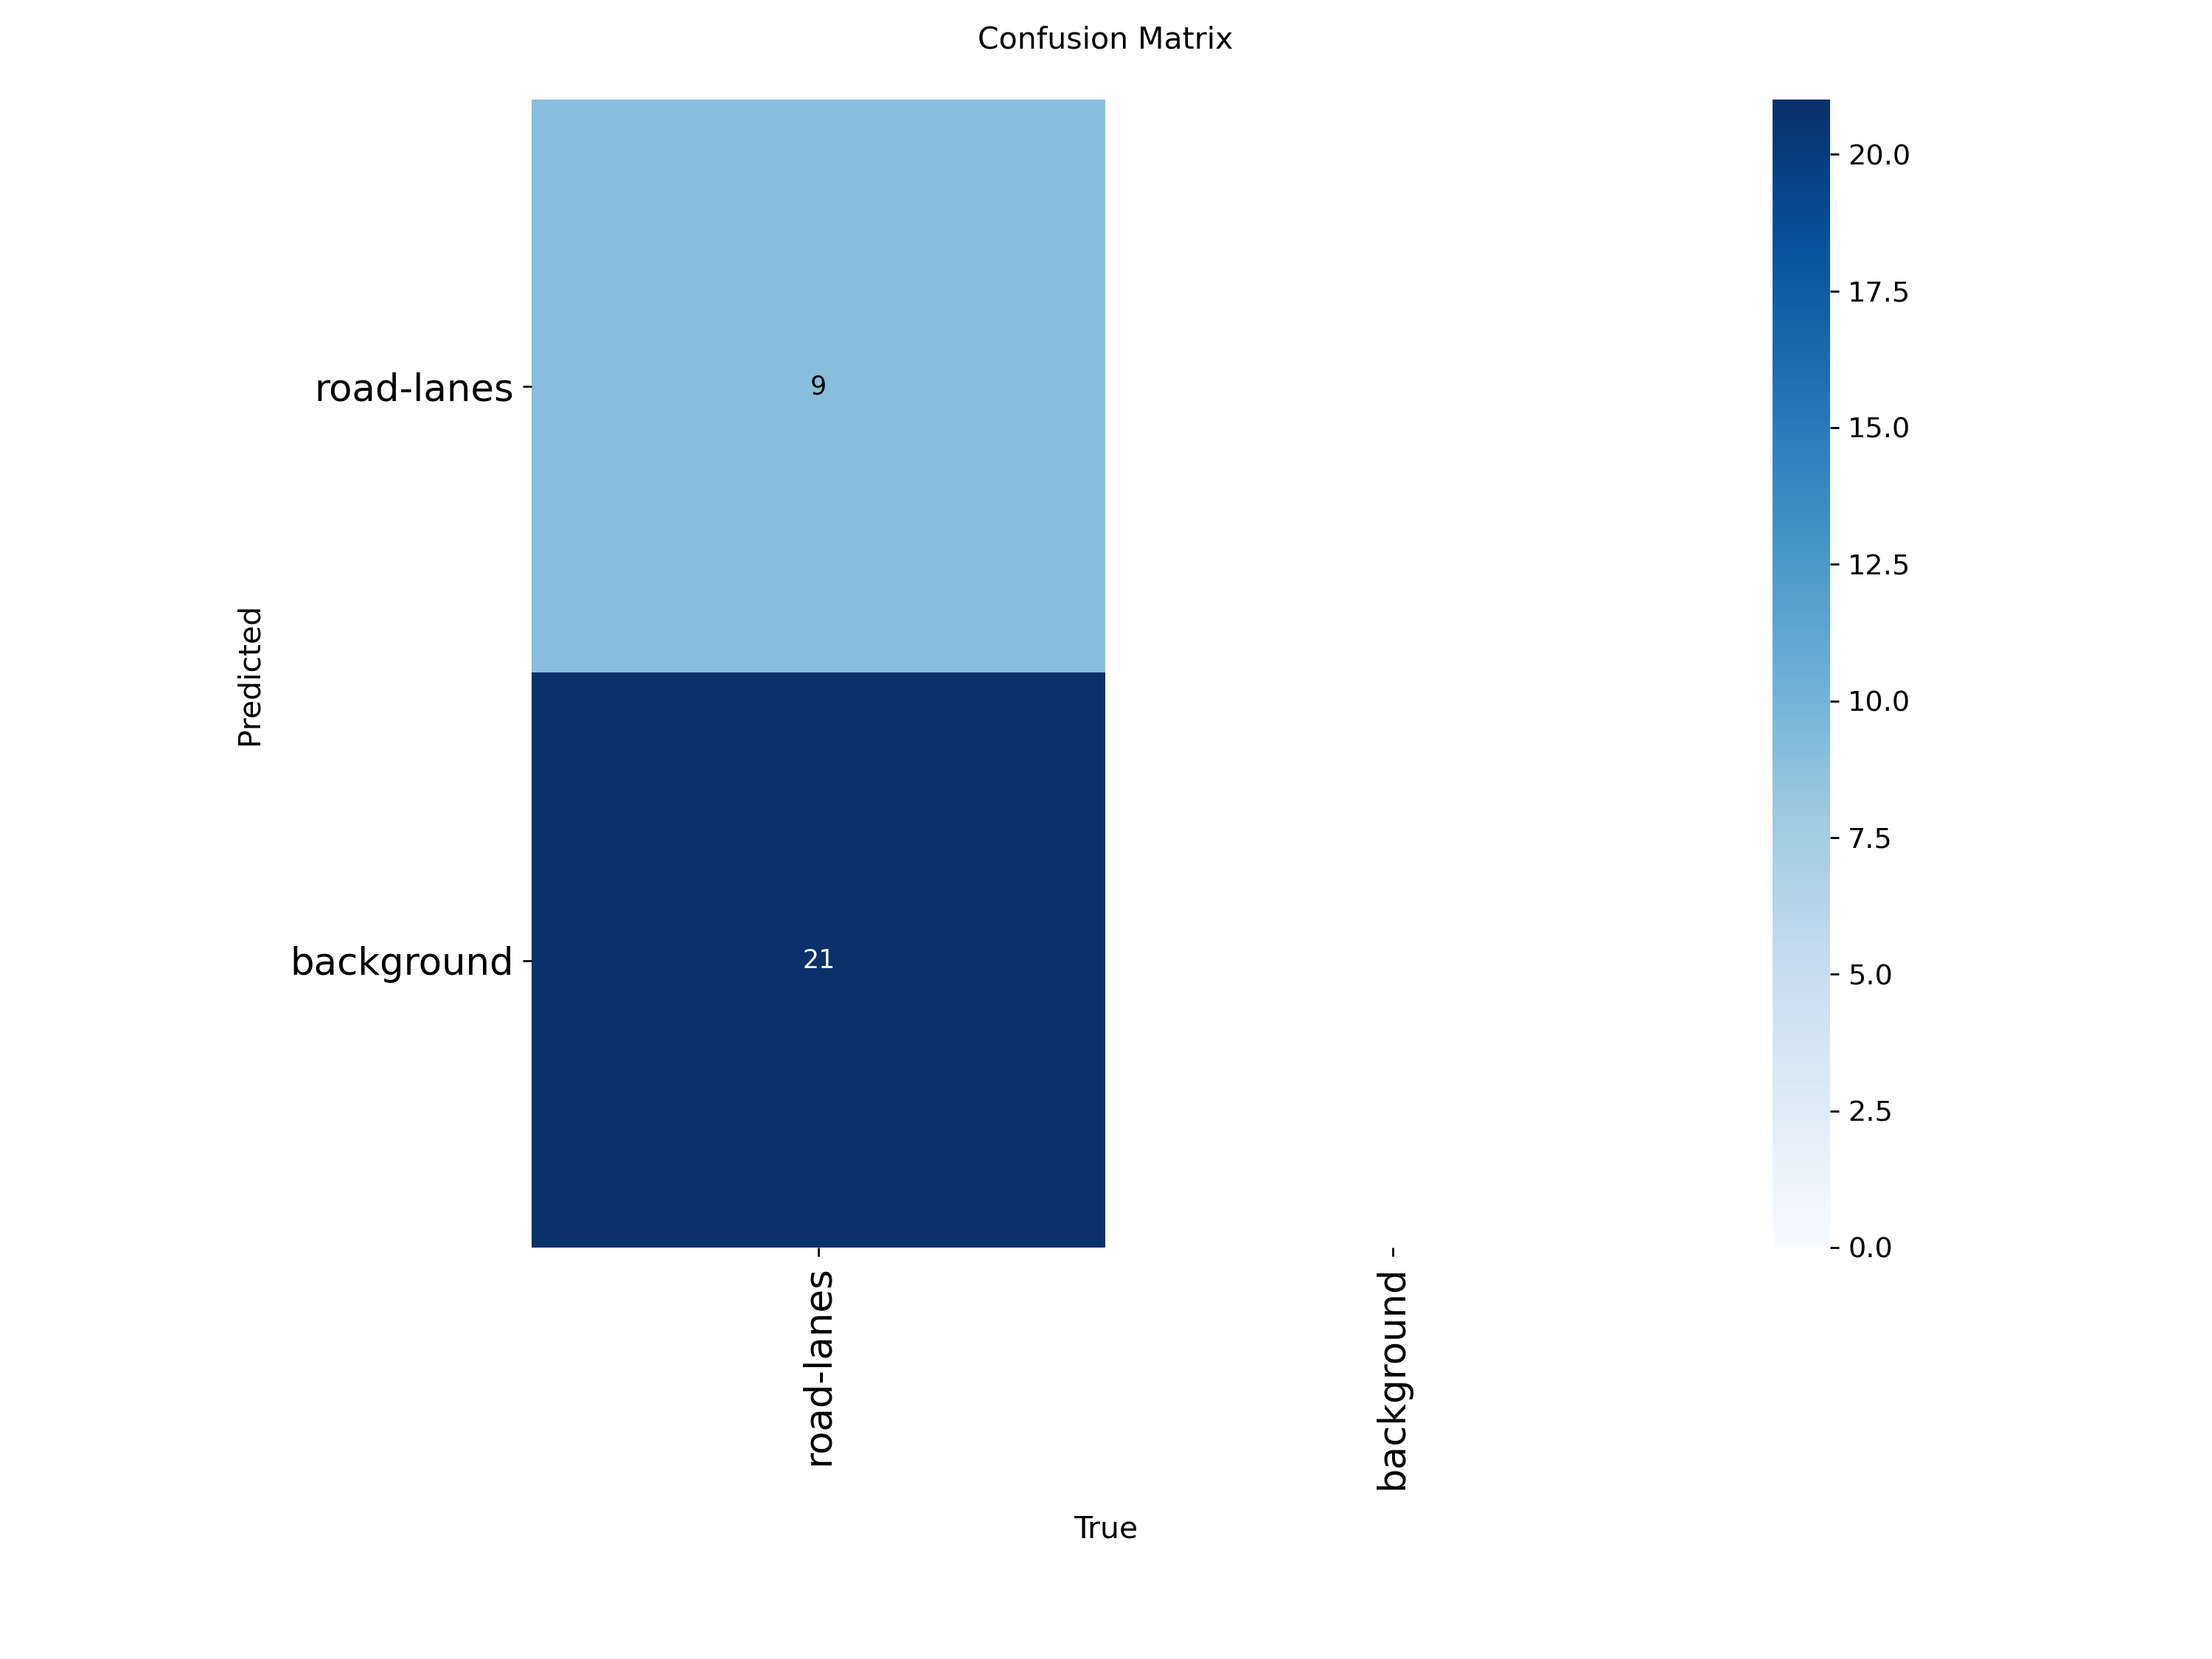

In [ ]:
# 9. Display the Confusion Matrix
#    Note: Updated path to match the 'faculty_presentation_run' name
print("\n Confusion Matrix:")
Image(filename='/content/runs/detect/faculty_presentation_run/confusion_matrix.png', width=600)


 Training Results:


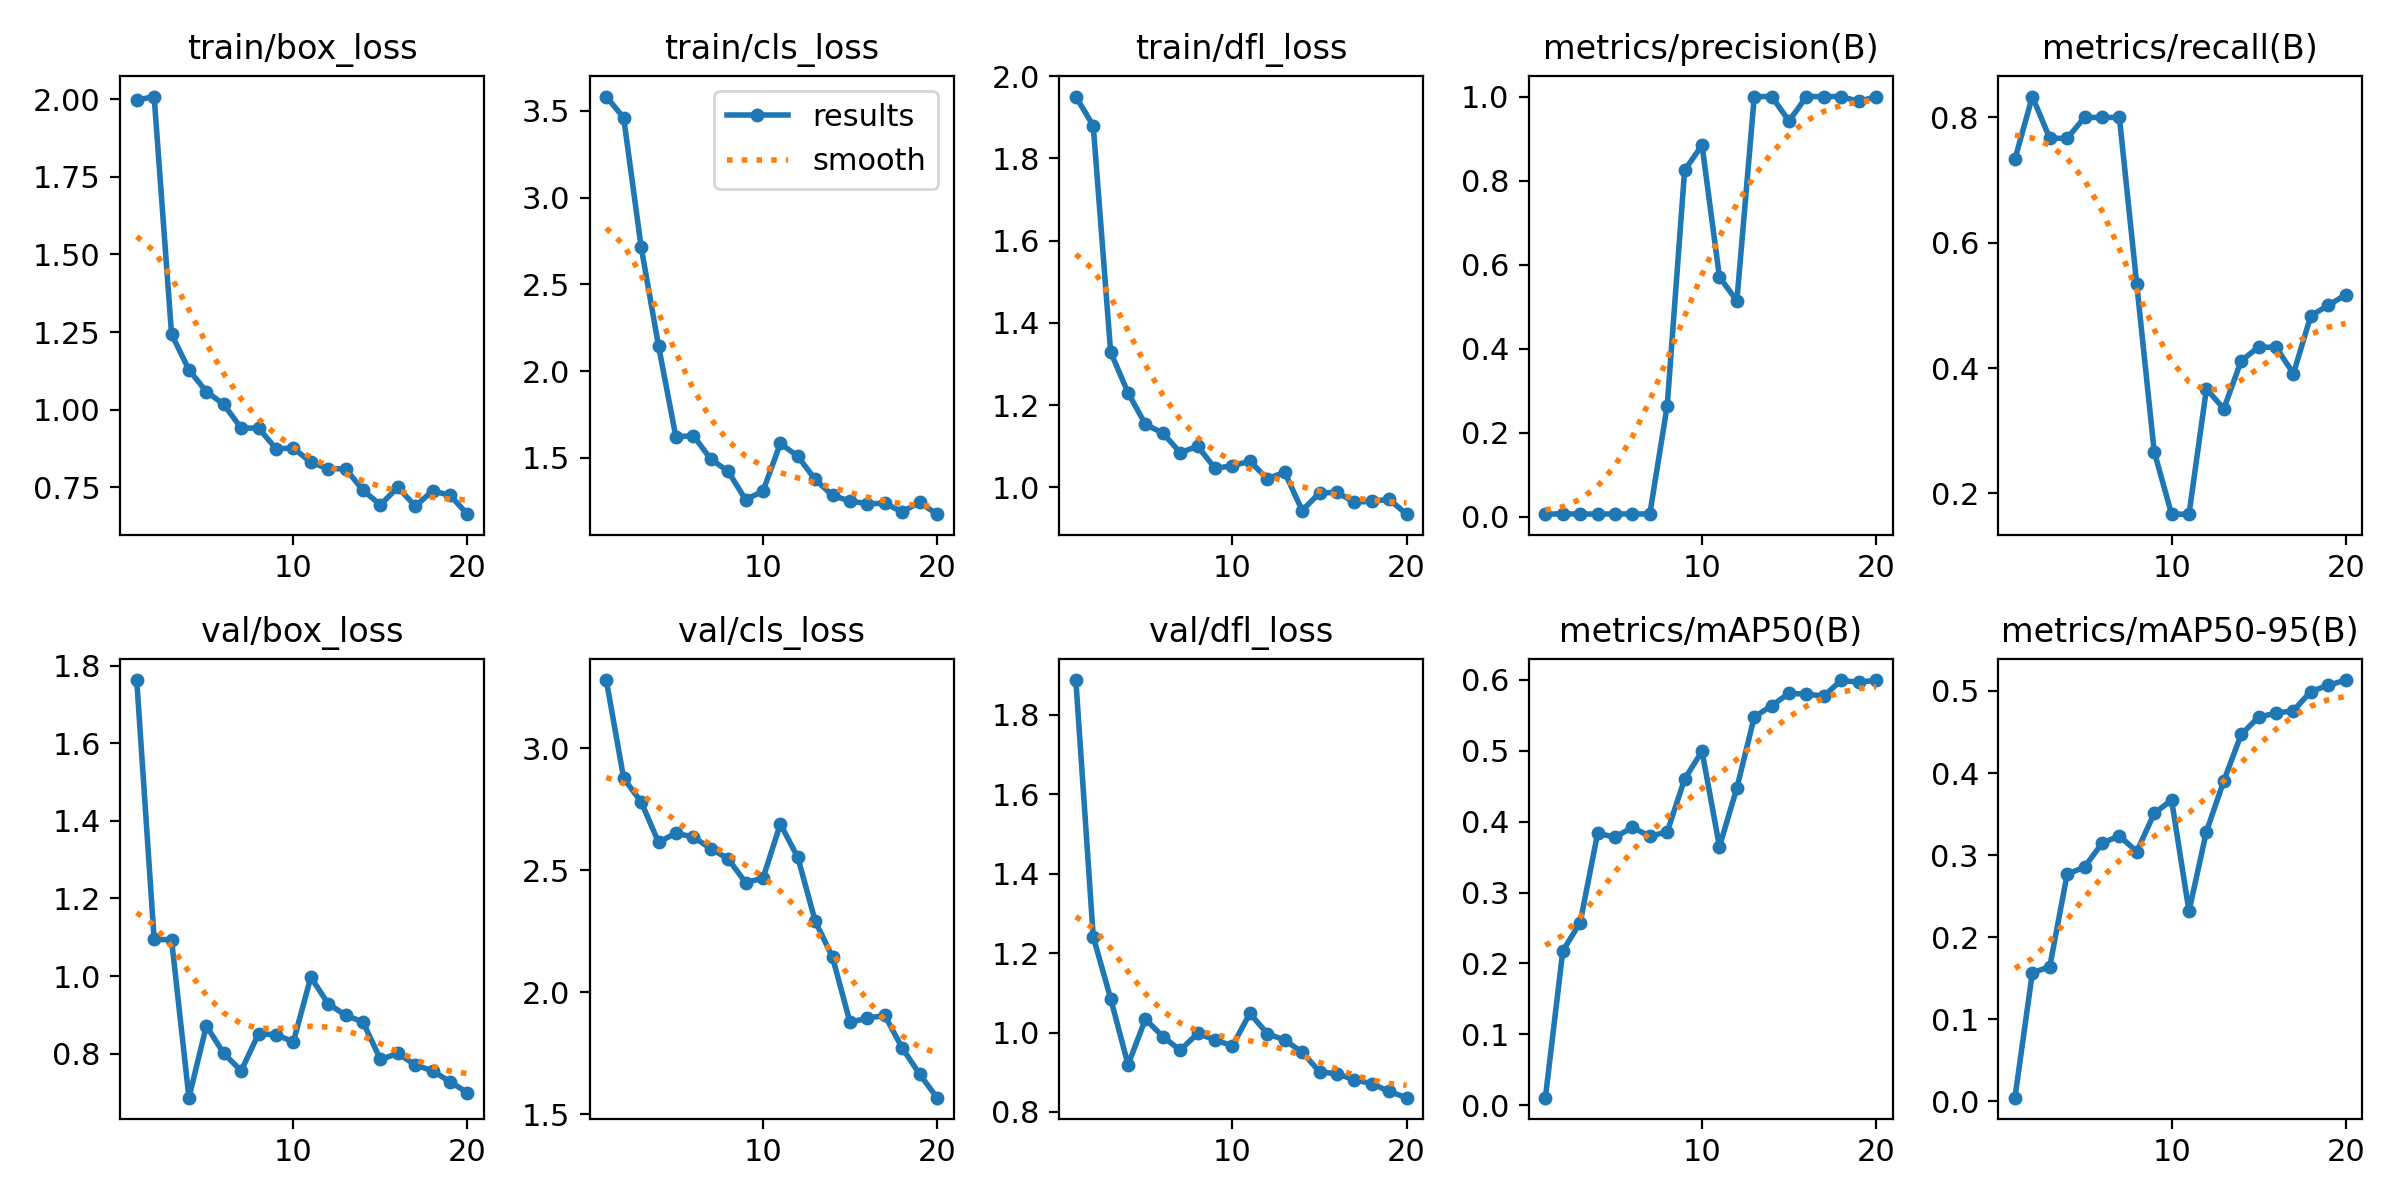

In [ ]:
# Display the training results graph
print("\n Training Results:")
Image(filename='/content/runs/detect/faculty_presentation_run/results.png', width=600)

In [ ]:
import os
import shutil
import pandas as pd
import glob
from IPython.display import clear_output

# --- CONFIGURATION ---
RUN_NAME = "faculty_presentation_run"  # Your specific run name
RUN_DIR = f"/content/runs/detect/{RUN_NAME}"
OUTPUT_DIR = "/content/for_report"

print(f" Processing results from: {RUN_DIR}")

# ==========================================
# PART 1: Create 'my_model.zip' (From your first Step 9)
# ==========================================
!mkdir -p /content/my_model
# Copy the best weights
!cp {RUN_DIR}/weights/best.pt /content/my_model/my_model.pt
# Copy the training logs
if os.path.exists(f"/content/my_model/{RUN_NAME}"):
    shutil.rmtree(f"/content/my_model/{RUN_NAME}")
!cp -r {RUN_DIR} /content/my_model/

# Zip it
%cd /content/my_model
!zip -q -r /content/my_model.zip .
%cd /content
print(f" Created /content/my_model.zip (Ready for download)")

# ==========================================
# PART 2: Copy Figures & Generate Table 1 (From your second Step 9)
# ==========================================
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 2a. Copy standard figures
figures = ["results.png", "PR_curve.png", "confusion_matrix.png"]
print(f"\n Copying figures to {OUTPUT_DIR}...")

for f in figures:
    # Look in the run directory
    src = os.path.join(RUN_DIR, f)
    if os.path.exists(src):
        shutil.copy2(src, os.path.join(OUTPUT_DIR, f))
        print(f"  - Copied {f}")
    else:
        print(f"   Warning: {f} not found (Training might be incomplete)")

# 2b. Make Table 1 from results.csv
csv_path = os.path.join(RUN_DIR, "results.csv")

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    # Fix column names (strip spaces)
    df.columns = df.columns.str.strip()

    # Get last row (final metrics)
    last = df.iloc[-1]

    P   = float(last["metrics/precision(B)"])
    R   = float(last["metrics/recall(B)"])
    mAP50 = float(last["metrics/mAP50(B)"])
    mAP95 = float(last["metrics/mAP50-95(B)"])

    # Create the text table
    table1 = f"""
    Table 1: Overall Detection Metrics after fine-tuning YOLOv8n

    +-----------+--------+----------+--------------+
    | Precision | Recall | mAP@0.50 | mAP@0.50:0.95|
    +-----------+--------+----------+--------------+
    |   {P:.3f}   |  {R:.3f} |   {mAP50:.3f}  |    {mAP95:.3f}     |
    +-----------+--------+----------+--------------+

    One-liner: YOLOv8n achieved Precision={P:.3f}, Recall={R:.3f}, mAP@0.50={mAP50:.3f}.
    """

    # Save to file
    with open(f"{OUTPUT_DIR}/Table1_overall_metrics.txt", "w") as f:
        f.write(table1)

    print("\n Table 1 Generated:")
    print(table1)
else:
    print(" Error: results.csv not found.")

 Processing results from: /content/runs/detect/faculty_presentation_run
/content/my_model
/content
 Created /content/my_model.zip (Ready for download)

 Copying figures to /content/for_report...
  - Copied results.png
  - Copied confusion_matrix.png

 Table 1 Generated:

    Table 1: Overall Detection Metrics after fine-tuning YOLOv8n
    
    +-----------+--------+----------+--------------+
    | Precision | Recall | mAP@0.50 | mAP@0.50:0.95|
    +-----------+--------+----------+--------------+
    |   1.000   |  0.517 |   0.600  |    0.513     |
    +-----------+--------+----------+--------------+
    
    One-liner: YOLOv8n achieved Precision=1.000, Recall=0.517, mAP@0.50=0.600.
    


In [ ]:
# --- Step 10 Setup ---
MODEL = f"/content/runs/detect/{RUN_NAME}/weights/best.pt"
DATA  = "/content/Dataset.v1i.yolov8/data.yaml"
VAL   = "/content/Dataset.v1i.yolov8/valid/images"
OUT   = "/content/to_report"

# Create the output directory
!mkdir -p "$OUT"

print(" Setup Complete:")
print(f"   Model: {MODEL}")
print(f"   Data:  {DATA}")
print(f"   Output Folder: {OUT}")

 Setup Complete:
   Model: /content/runs/detect/faculty_presentation_run/weights/best.pt
   Data:  /content/Dataset.v1i.yolov8/data.yaml
   Output Folder: /content/to_report
